In [22]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [24]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [25]:
df.shape

(205, 26)

In [26]:
features = ["enginesize", "horsepower", "curbweight", "citympg", "highwaympg"]
target = ["price"]

x=df[features]
y = df["price"]


In [27]:
#replacing the missing values
x=x.fillna(x.mean())
y=y.fillna(y.mean())

In [28]:
m=len(df)
split_index = int(0.8*m)
x_train = x.iloc[:split_index].values
y_train = y.iloc[:split_index].values
x_test = x.iloc[split_index:].values
y_test = y.iloc[split_index:].values


In [29]:
mu = np.mean(x_train, axis=0)
sigma = np.std(x_train, axis=0)
x_train=(x_train-mu)/sigma
x_test=(x_test-mu)/sigma

In [30]:
def predict(x, w, b):
    return np.dot(x, w) + b

def compute_cost(x, y, w, b):
    m = len(y)
    predictions = predict(x, w, b)
    return (1/(2*m))*np.sum((predictions-y)**2)

def compute_gradient(x, y, w, b):
    m = len(y)
    predictions = predict(x, w, b)
    dj_dw = (1/m)*np.dot(x.T, (predictions-y))
    dj_db = (1/m)*np.sum(predictions-y)
    return dj_dw, dj_db

def gradient_descent(x, y, w, b, alpha, iter):
    cost_history = []
    for i in range(iter):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)
    return w, b, cost_history
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [39]:
n = x_train.shape[1]
w_init = np.zeros(n)
b_init = 0
alpha = 0.01
iterations = 1000

In [32]:
w_final, b_final, cost_history = gradient_descent(x_train, y_train, w_init, b_init, alpha, iter)


<function matplotlib.pyplot.show(close=None, block=None)>

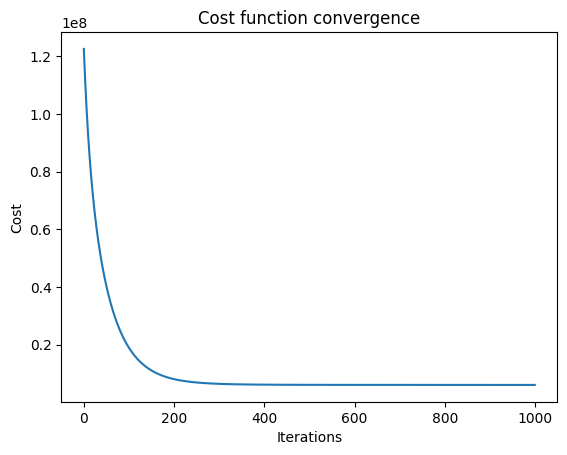

In [33]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost function convergence")
plt.show

In [34]:
train_predictions = predict(x_train, w_final, b_final)
test_predictions = predict(x_test, w_final, b_final)

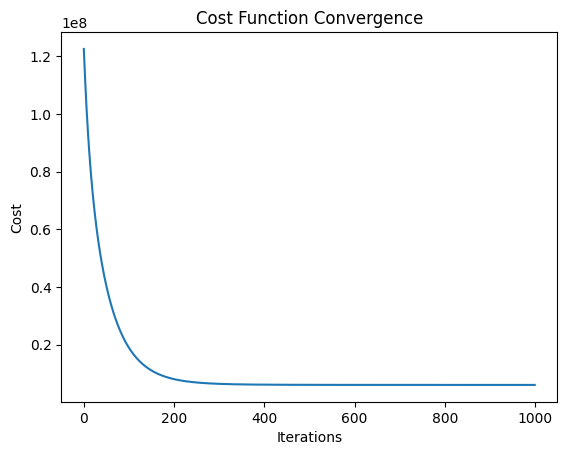

In [40]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

Train RMSE: 3473.12205296297
Test RMSE: 3409.772432181558


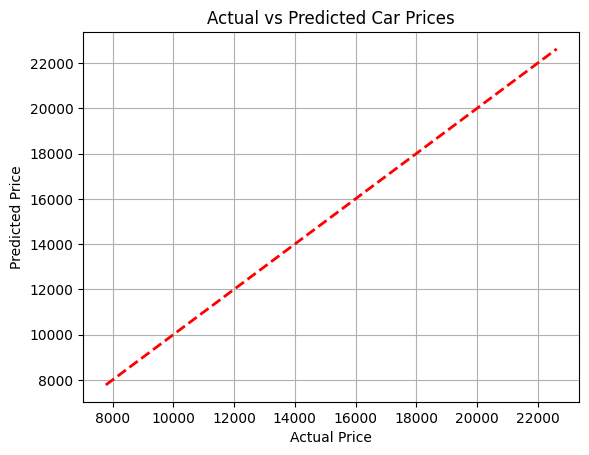


Final Weights: [3884.56626348 2501.52746262 2203.37890928  102.77670513   82.95147296]
Final Bias: 13357.695666475076


In [41]:
print("Train RMSE:", rmse(y_train, train_predictions))
print("Test RMSE:", rmse(y_test, test_predictions))

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()

print("\nFinal Weights:", w_final)
print("Final Bias:", b_final)